<a href="https://colab.research.google.com/github/he16946/Assignment2020/blob/main/Assignment2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson's Classification

## Info 

---



This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). *Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column)*. The main aim of the data is to discriminate healthy people from those with PD, **according to "status" column which is set to 0 for healthy and 1 for PD**.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. *There are around six recordings per patient, the name of the patient is identified in the first column*.



---



### Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status

**Health status of the subject (one) - Parkinson's, (zero) - healthy**

RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation


---



##imports

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cbook
from sklearn.datasets import make_blobs
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import (cross_validate, cross_val_score,
                                     RepeatedStratifiedKFold, GridSearchCV)
from sklearn.metrics import (make_scorer, accuracy_score, confusion_matrix)
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier

### Data 

#### Examining Data 

In [131]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df_copy = df

In [ ]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
df.head(30)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
#how imbalanced is the data?

print('Positive', round(df['status'].value_counts()[1]/len(df) * 100,2),'% of the dataset')
print('Healthy', round(df['status'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

Positive 75.38 % of the dataset
Healthy 24.62 % of the dataset


In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.hist(figsize = (20,20))

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="status")

In [ ]:
plt.figure(figsize=(30,30))  
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

Text(0.5, 1.0, 'Observe status distribution')

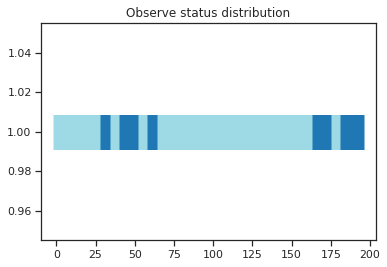

In [ ]:
# Observing status distribution by taking random samples of data frame 

fig1, ax1 = plt.subplots()

ax1.scatter(range(len(df['status'])),  [1] * len(df['status']), 
            c=df['status'], marker='_', lw=35, cmap='tab20')

ax1.set_title('Observe status distribution')

#### Splitting Data

In [132]:
#list of target values
target = df_copy.pop('status')
df_copy.pop('name')

#normalize df
df_copy = ((df_copy - df_copy.min())/(df_copy.max()-df_copy.min()))

In [133]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(df_copy, target, shuffle=True,
                                             random_state=15, train_size = 0.8,
                                              stratify=target)

###Classification

In [101]:
def FindResults(labels, classifiers, x_train, y_train, x_test, y_test):

  train_score=np.array([])
  test_score=np.array([])

  for clf, label in zip(classifiers, labels):
    
      cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
      scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=cv)
      #print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
      train_score = np.append(train_score,scores.mean())
      #bst_tr_err=y_train==bstlfy.predict(x_train)
      #train_score = np.append(train_score, bst_tr_err)

      predict_scores = accuracy_score(y_test,clf.predict(x_test))
      #print("Predict on test data: %0.3f" % predict_scores)
      test_score = np.append(test_score,  predict_scores)
      #bst_tst_err=y_test==bstlfy.predict(x_test)
      #test_score= np.append(test_score,  bst_tst_err)
  
  return train_score, test_score;

def Chart_ROC (labels, classifiers):
  
  for clf, label in zip(classifiers, labels):

    y_pred_proba = clf.predict_proba(x_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.figure(figsize=[10,8])
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label=label)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc='lower right')

def ChartResults (labels, training_scores, testing_scores):

  fig, ax = plt.subplots(figsize=[25,6])

  x = np.arange(len(labels)) 
  
  rects1 = ax.bar(x - 0.35/2, training_scores, 0.35, label='Training score',\
                  color='#f6335f')
  rects2 = ax.bar(x + 0.35/2, testing_scores, 0.35, label='Test score',\
                  color='#f6a45f')

  ax.set_xticks(x)
  ax.set_xticklabels(labels)   
  ax.legend(loc='lower left')
  ax.set_ylim([0.0, 1.05])
  plt.minorticks_on()
  plt.grid(axis= 'y', linestyle='--', which='both') 
  a = get_gridlines(ax.yaxis, 'minor')
  b = a[14]
  b.set_color('red') 

  plt.show()

def get_gridlines(ax, which):
        if which == 'major':
            ticks = ax.get_major_ticks()
        if which == 'minor':
            ticks = ax.get_minor_ticks()

        return cbook.silent_list('Line2D gridline',
                                 [tick.gridline for tick in ticks])

In [ ]:
# "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
# "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
# "Naive Bayes", "QDA"

# Defining classifiers

bagging = BaggingClassifier(DecisionTreeClassifier(),  max_samples=0.6, max_features=0.6)
knc = KNeighborsClassifier(n_neighbors=2)
svc = SVC(gamma=.1, kernel='rbf', probability=True)

lr = LogisticRegression(random_state=1)
gnb = GaussianNB()

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=None)
abc = AdaBoostClassifier(n_estimators=100)
rfc = RandomForestClassifier(n_estimators=100, max_depth = None, min_samples_split =2,\
                             random_state =0, oob_score=True)

etc = ExtraTreesClassifier(n_estimators=100, max_depth=None)
dt = tree.DecisionTreeClassifier()
vc = VotingClassifier(estimators=[('lr', lr),  ('gnb', gnb), ('knn', knc),
                                  ('svc', svc),('dt', dt),('etc', etc),
                                  ('rfc', rfc), ('abc', abc),('gbc', gbc)],
                       voting='hard')
rc = RidgeClassifier()

# Training classifiers

knc.fit(x_train, y_train)
svc.fit(x_train, y_train)
vc.fit(x_train, y_train)

lr.fit(x_train, y_train)
gnb.fit(x_train, y_train)
bagging.fit(x_train, y_train)

dt.fit(x_train, y_train)
etc.fit(x_train,y_train)
rfc.fit(x_train, y_train)

abc.fit(x_train, y_train)
gbc.fit(x_train, y_train)
rc.fit(x_train, y_train)

In [102]:
# Finding and plotting results
labels = ['K Neighbors', 'SVC','Voting Classifier', 
          'Logistic Regression', 'GaussianNB', 'Bagging Classifier',
          'Decision Tree', 'Extra Tree', 'Random Forest',
          'Ada Boost', 'Gradient Boost', 'Ridge Classifier']

classifiers = [knc, svc, vc, lr, gnb, bagging, dt, etc, rfc, abc, gbc, rc]

TRNS, TSTS = FindResults(labels, classifiers, x_train, y_train, x_test, y_test)

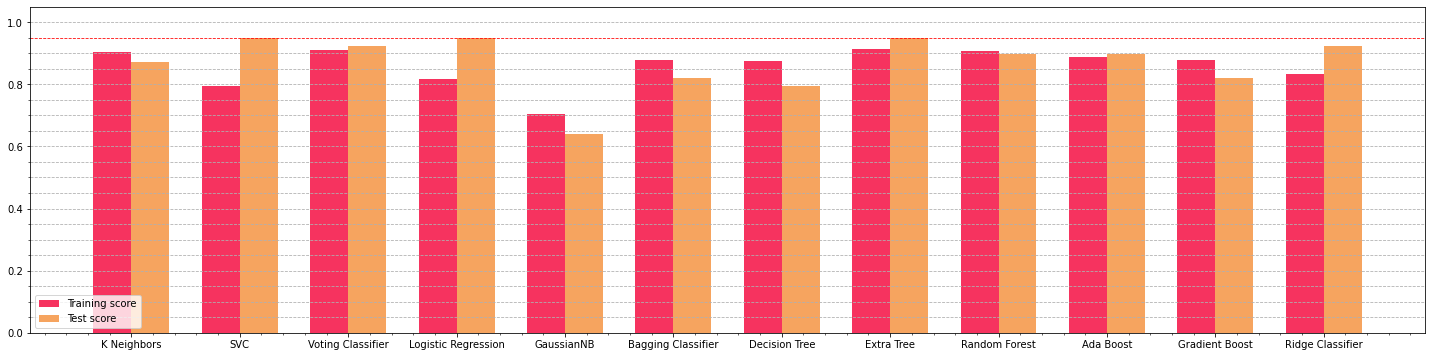

In [103]:
ChartResults(labels, TRNS, TSTS)

As the red dotted line indicates the 95% accuracy benchmark, a few classifiers already reach that level of accuracy. A few are close, and may reach 95% with more paramter tuning. Best performing classifiers are: SVC, Logistic Regression, Extra Tree. Second best: K-Neighbours, Voting Classifier, Bagging, Random Forest, Ada Boost, Ridge Classifier.

### SVM

In [ ]:
Cs = [100.0, 10.0, 1.0, 0.1, 0.001]
degrees = [0, 1, 2, 3, 4, 5, 6]
gammas = np.logspace(-2, 2, 15)
ker = ['linear', 'rbf', 'poly']
#, 'sigmoid','poly', 'linear']

scoring = ['accuracy']

repeatedStratifiedKFold = RepeatedStratifiedKFold(n_splits=10,n_repeats=20)

clf = svm.SVC()

clf = GridSearchCV(estimator=clf, \
                   param_grid=dict(C=Cs, gamma=gammas, degree=degrees,\
                   kernel=ker),
                   scoring=scoring,
                   refit='accuracy',
                   cv=repeatedStratifiedKFold,
                   n_jobs=-1)

clf.fit(x_train, y_train)
print(clf.best_score_)
clf.best_estimator_

### Logistic Regression

In [51]:
# example of grid searching key hyperparametres for logistic regression
# define models and parameters

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'none']
penalty = ['l2', 'l1', 'none']
c_values = [1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=dict(solver=solvers, \
                            penalty=penalty, C=c_values), n_jobs=-1, cv=cv,
                           scoring='accuracy', error_score=0)

grid_search.fit(x_train, y_train)
print(grid_search.best_score_)
grid_search.best_estimator_


0.8479166666666668


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
logit = LogisticRegression(C= 100.0, penalty= 'l2', solver= 'newton-cg')

cv_results = cross_val_score(logit, x_train, y_train, cv=15, scoring="accuracy")

print("%0.3f" %cv_results.mean())
logit.fit(x_train, y_train)
predict_scores = accuracy_score(y_test,logit.predict(x_test))
print("Predict on test data: %0.3f" % predict_scores)

0.847
Predict on test data: 0.923


### Random Forest

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,
            max_depth=None)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)

grid_search.fit(x_train, y_train)
print(grid_search.best_score_)
grid_search.best_estimator_

### Extra Trees

In [157]:
n_trees = [10, 50, 60, 70, 100, 500]
i = range(1, 21)

# define grid search
grid = dict(n_estimators=n_trees,max_features=i)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

model = ExtraTreesClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)

grid_search.fit(x_train, y_train)
print(grid_search.best_score_)
grid_search.best_estimator_

KeyboardInterrupt: ignored

### Bagging 

In [44]:
clf=DecisionTreeClassifier(max_features=None)
clf=clf.fit(x_train,y_train)
train_error=y_train==clf.predict(x_train)
test_error=y_test==clf.predict(x_test)
max_n_ests=1000

results=pd.DataFrame([],columns=list(['type','n_leaf','n_est',\
    'train_acc','test_acc']))

# Train bagging ensemble on iterations of n_estimators=i
# and iterations of stump max_leaf_nodes=j
for j in [500,2000,8000,99999]:
    clf_stump=DecisionTreeClassifier(max_features=None,max_leaf_nodes=j)
    for i in np.arange(1,max_n_ests):
        baglfy=BaggingClassifier(base_estimator=clf_stump,n_estimators=i,
            max_samples=1.0)
        baglfy=baglfy.fit(x_train,y_train)
        bag_tr_err=y_train==baglfy.predict(x_train)
        bag_tst_err=y_test==baglfy.predict(x_test)
        run_rslt=pd.DataFrame([['bag',j,i,sum(bag_tr_err)/len(bag_tr_err),
            sum(bag_tst_err)/len(bag_tst_err)]],
            columns=list(['type','n_leaf','n_est','train_acc','test_acc']))
        results=results.append(run_rslt)

KeyboardInterrupt: ignored

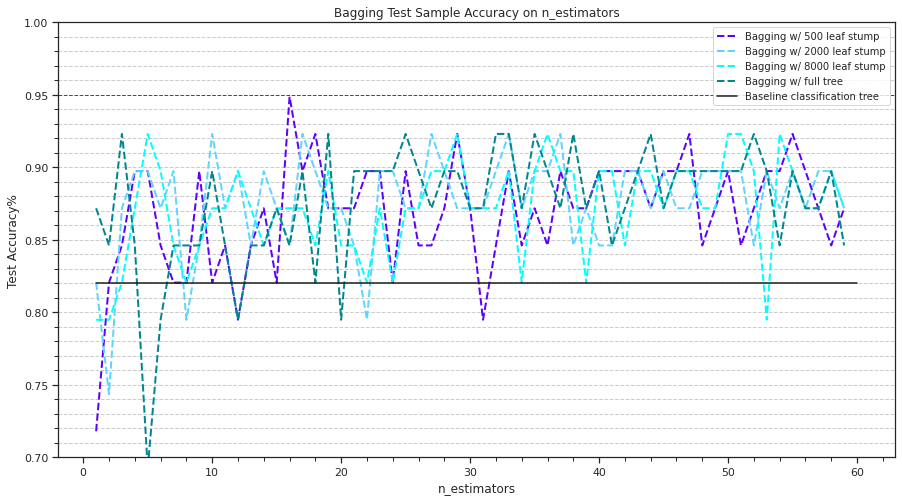

In [ ]:
# Plot Bagging accuracy results on test data
# 500 leaf stumps
#plt.figure(figsize=[15,8])
fig, ax = plt.subplots(figsize=[15,8])

plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==500)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==500)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#5e00ff', \
    label='Bagging w/ 500 leaf stump')
# 2000 leaf stumps
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==2000)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==2000)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#5ed5ff', \
    label='Bagging w/ 2000 leaf stump')
# 8000 leaf stumps
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==8000)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==8000)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#00ffff', \
    label='Bagging w/ 8000 leaf stump')
# Full Classification Trees (no early termination)
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==99999)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==99999)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#00868e', \
    label='Bagging w/ full tree')
# Plot test accuracy of baseline classification tree
clf_test_acc=sum(test_error)/len(test_error)
plt.plot([1,max_n_ests],[clf_test_acc,clf_test_acc],color='k', \
    label='Baseline classification tree')

plt.legend(fontsize=10)
plt.title('Bagging Test Sample Accuracy on n_estimators')
plt.ylim([0.7, 1.0])
plt.minorticks_on()
plt.grid(axis= 'y', linestyle='--', which='both')   
plt.ylabel('Test Accuracy%')
plt.xlabel('n_estimators')
a = get_gridlines(ax.yaxis, 'major')
b = a[5]
b.set_color('red') 

plt.show()

As the red dotted line indicates the 95% accuracy benchmark, the accuracy fluctuates many times, so it will be difficult to replicate the resulting accuracy with the parameters on this graph. A few times 95% is reached but only at one point. Since the accuracy is inconsistent at these points in the graph, this is considered the limit of accuracy to be achieved by Bagging.

In [42]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10,100,1000,1500]

# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


0.875833 (0.049784) with: {'n_estimators': 10}
0.907917 (0.066478) with: {'n_estimators': 100}
0.910000 (0.066394) with: {'n_estimators': 1000}
0.907778 (0.062377) with: {'n_estimators': 1500}
Best: 0.910000 using {'n_estimators': 1000}


### Ada Boosting

In [ ]:
clf=DecisionTreeClassifier(max_features=None)
clf=clf.fit(x_train,y_train)
train_error=y_train==clf.predict(x_train)
test_error=y_test==clf.predict(x_test)

max_n_ests=60

results=pd.DataFrame([],columns=list(['type','l_r','n_est', \
                  'train_acc','test_acc']))

# Train boosting ensemble on iterations of n_estimators=i 
# and learning rate 0.5-1

for i in np.arange(1, max_n_ests):
  for j in [0.5,0.6,0.7,0.8,0.9,1]:
    bstlfy=AdaBoostClassifier(n_estimators=i, learning_rate = j)
    bstlfy=bstlfy.fit(x_train, y_train)
    bst_tr_err=y_train==bstlfy.predict(x_train)
    bst_tst_err=y_test==bstlfy.predict(x_test)
    run_rslt=pd.DataFrame([['bst',j,i,sum(bst_tr_err)/len(bst_tr_err),
          sum(bst_tst_err)/len(bst_tst_err)]],
    columns=list(['type','l_r','n_est','train_acc','test_acc']))
    results=results.append(run_rslt)

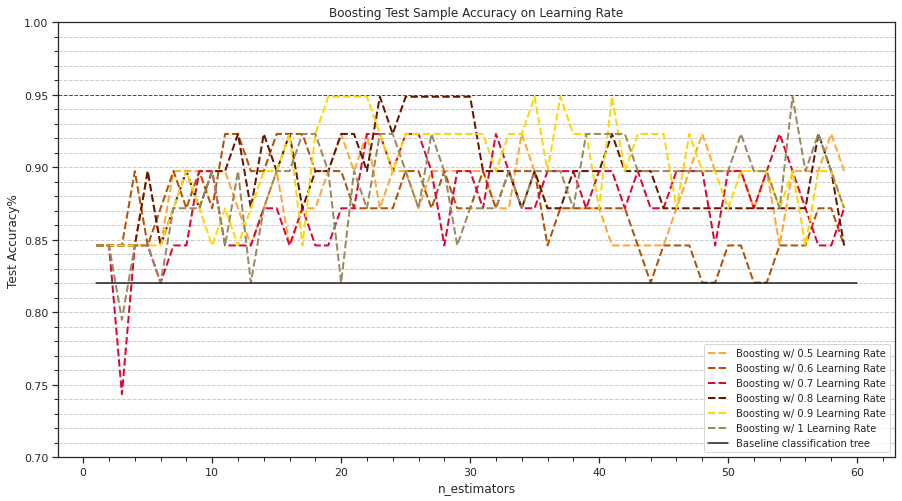

In [ ]:
# Plot Boosting accuracy results on test data
# 0.5 Learning Rate
# plt.figure(figsize=[15,8])
fig, ax = plt.subplots(figsize=[15,8])

plt.plot(results.loc[((results.type=='bst')&(results.l_r==0.5)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==0.5)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#ffa634', \
    label='Boosting w/ 0.5 Learning Rate')

# 0.6 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==0.6)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==0.6)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#b25202', \
    label='Boosting w/ 0.6 Learning Rate')

# 0.7 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==0.7)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==0.7)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#da0734', \
    label='Boosting w/ 0.7 Learning Rate')

# 0.8 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==0.8)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==0.8)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#661400', \
    label='Boosting w/ 0.8 Learning Rate')

# 0.9 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==0.9)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==0.9)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#fed606', \
    label='Boosting w/ 0.9 Learning Rate')

# 1 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==1)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==1)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#98895f', \
    label='Boosting w/ 1 Learning Rate')

# Plot test accuracy of baseline classification tree
plt.plot([1,max_n_ests],[clf_test_acc,clf_test_acc],color='k', \
    label='Baseline classification tree')

plt.legend(fontsize=10)
plt.title('Boosting Test Sample Accuracy on Learning Rate')
plt.ylim([0.7,1.0])
plt.minorticks_on()
plt.grid(axis= 'y', linestyle='--', which='both') 
plt.ylabel('Test Accuracy%')
plt.xlabel('n_estimators')
a = get_gridlines(ax.yaxis, 'major')
b = a[5]
b.set_color('red') 


plt.show()

As the red dotted line indicates the 95% accuracy benchmark, the value doesn't
fluctuate or reach 95% at only one point between n_esimators 27-30 with learning rate 0.8 and between 18-22 with learning rate 0.9. Since the accuracy is consistent at these points in the graph, these values are chosen as the most
optimal paramters for AdaBoosting. 

### KNN

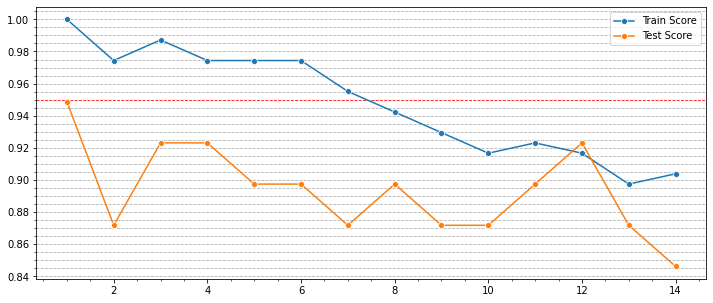

In [10]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

fig, ax = plt.subplots(figsize=[12,5])
plt.minorticks_on()
plt.grid(axis= 'y', linestyle='--', which='both') 

p = sns.lineplot(x=range(1,15),y=train_scores,marker='o',label='Train Score')
p = sns.lineplot(x=range(1,15),y=test_scores,marker='o',label='Test Score')

a = get_gridlines(ax.yaxis, 'minor')
b = a[16]
b.set_color('red') 


In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_)) 



Best Score:0.9485887096774194
Best Parameters: {'n_neighbors': 1}


As the red dotted line indicates the 95% accuracy benchmark, the value of k 
on the x-axis that meets that line is 1. This value is chosen as the most
optimal paramter.

### Gradient Boosting

In [184]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, \
            subsample=subsample, max_depth=max_depth)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
print(grid_result.best_score_)
grid_result.best_estimator_

KeyboardInterrupt: ignored

In [ ]:
fig, ax = plt.subplots(figsize=[15,8])

plt.plot(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['mean_score_time']
         ,linestyle='--',linewidth=2,color='#ffa634')

plt.ylim([0.7,1.0])
plt.minorticks_on()
plt.grid(axis= 'y', linestyle='--', which='both') 
a = get_gridlines(ax.yaxis, 'major')
b = a[5]
b.set_color('red') 


plt.show()

### Ridge Classifier

0.8415277777777779


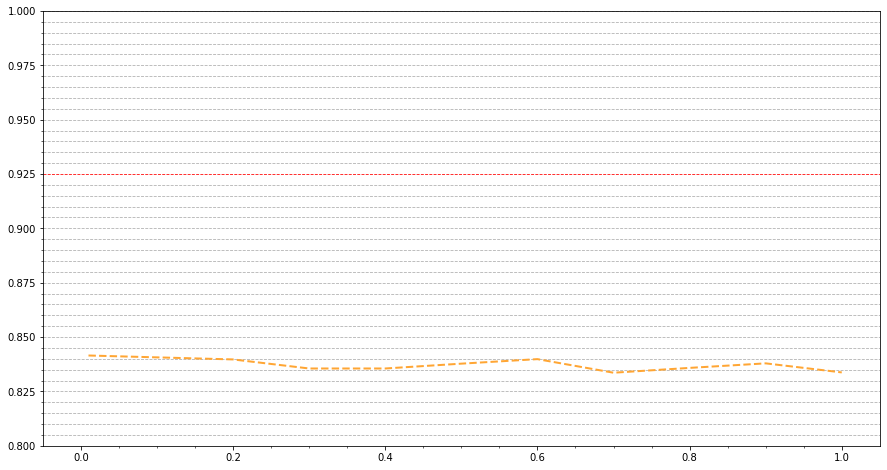

In [179]:
# define models and parameters
model = RidgeClassifier()
alpha = [0.01, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

print(grid_result.best_score_)
grid_result.best_estimator_

fig, ax = plt.subplots(figsize=[15,8])

plt.plot(alpha, grid_result.cv_results_['mean_test_score'],
         linestyle='--',linewidth=2,color='#ffa634')

plt.plot(grid_result.best_score_, 
         linestyle='--',linewidth=2)

plt.ylim([0.8,1.0])
plt.minorticks_on()
plt.grid(axis= 'y', linestyle='--', which='both') 
a = get_gridlines(ax.yaxis, 'major')
b = a[5]
b.set_color('red') 


plt.show()

### Best Scores

Train with best performing paramters, create confusion matrix, the ROC chart.
True Positive Rate to False Positive Rate The Area Under Curve determines how well the classifier performs, hugging the y-axis indicates high TPR and zero FPR. 

#### Best Classsifier 1: SVM

In [185]:
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report

best1= SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0, gamma=7.196856730011514,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

best1.fit(x_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
scores = cross_val_score(best1, x_train, y_train, scoring='accuracy', cv=cv)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

predict_scores = accuracy_score(y_test,best1.predict(x_test))
print("Predict on test data: %0.3f" % predict_scores)
print("Classification report  \n %s" %(classification_report(y_test, best1.predict(x_test))))

Accuracy: 0.956 (+/- 0.055)
Predict on test data: 0.923
Classification report  
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



Text(0.5, 15.0, 'Predicted label')

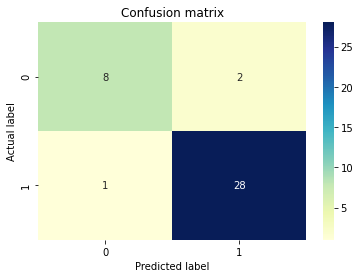

In [62]:
y_pred = best1.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

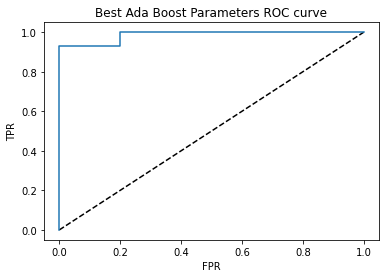

In [63]:
y_pred_proba = best1.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Ada')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Best Ada Boost Parameters ROC curve')
plt.show()

#### Best Classsifier 2: Logistic Regression

In [187]:
best2 = LogisticRegression(C=10, penalty='l1', solver='liblinear')

best2.fit(x_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
scores = cross_val_score(best2, x_train, y_train, scoring='accuracy', cv=cv)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

predict_scores = accuracy_score(y_test,best2.predict(x_test))
print("Predict on test data: %0.3f" % predict_scores)
print("Classification report  \n %s" %\
      (classification_report(y_test, best2.predict(x_test))))

Accuracy: 0.842 (+/- 0.085)
Predict on test data: 0.897
Classification report  
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39



In [188]:
best20 = LogisticRegression()
best20.fit(x_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
scores = cross_val_score(best20, x_train, y_train, scoring='accuracy', cv=cv)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

predict_scores = accuracy_score(y_test,best20.predict(x_test))
print("Predict on test data: %0.3f" % predict_scores)

print("Classification report  \n %s" %\
      (classification_report(y_test, best20.predict(x_test))))

Accuracy: 0.821 (+/- 0.087)
Predict on test data: 0.949
Classification report  
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



Text(0.5, 15.0, 'Predicted label')

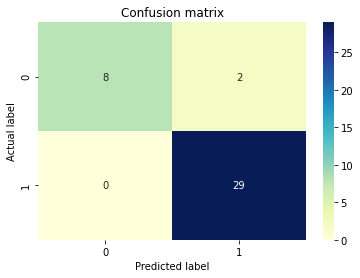

In [115]:
y_pred = best20.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

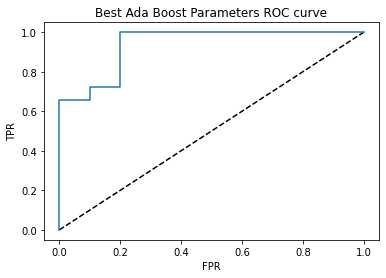

In [113]:
y_pred_proba = best20.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Ada')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Best Ada Boost Parameters ROC curve')
plt.show()

#### Best Classsifier 3: Ada Boost

In [189]:
best3 = AdaBoostClassifier(n_estimators=20, learning_rate = 0.9)

best3.fit(x_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
scores = cross_val_score(best3, x_train, y_train, scoring='accuracy', cv=cv)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

predict_scores = accuracy_score(y_test,best3.predict(x_test))
print("Predict on test data: %0.3f" % predict_scores)
print("Classification report  \n %s" %\
      (classification_report(y_test, best3.predict(x_test))))

Accuracy: 0.864 (+/- 0.085)
Predict on test data: 0.949
Classification report  
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



Text(0.5, 15.0, 'Predicted label')

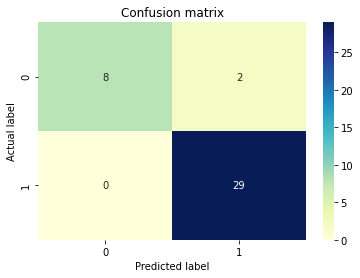

In [70]:
y_pred = best3.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

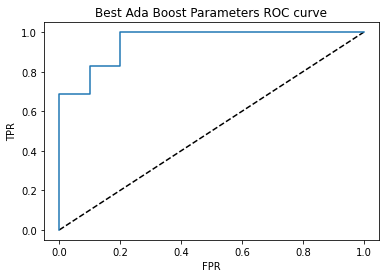

In [71]:
y_pred_proba = best3.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Ada')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Best Ada Boost Parameters ROC curve')
plt.show()

#### Best Classsifier 4: KNN

In [190]:
best4 = KNeighborsClassifier(1)
best4.fit(x_train,y_train)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
scores = cross_val_score(best4, x_train, y_train, scoring='accuracy', cv=cv)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

predict_scores = accuracy_score(y_test,best4.predict(x_test))
print("Predict on test data: %0.3f" % predict_scores)

print("Classification report  \n %s" %\
      (classification_report(y_test, best4.predict(x_test))))

Accuracy: 0.957 (+/- 0.056)
Predict on test data: 0.949
Classification report  
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39



Text(0.5, 15.0, 'Predicted label')

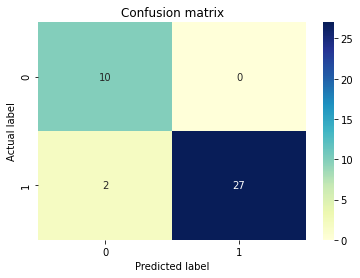

In [73]:
y_pred = best4.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

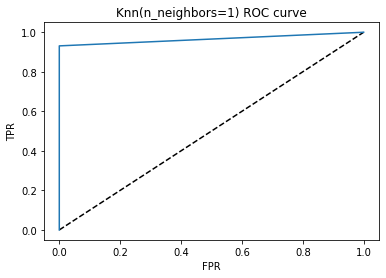

In [74]:
y_pred_proba = best4.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Knn(n_neighbors=1) ROC curve')
plt.show()

#### Best Classifier 5: Voting Classifier

In [191]:
best5 = VotingClassifier(estimators=[('lr', best2), ('knn', best4),
                                  ('svc', best1), ('abc', best3)],
                       voting='soft')
best5.fit(x_train,y_train)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
scores = cross_val_score(best5, x_train, y_train, scoring='accuracy', cv=cv)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

predict_scores = accuracy_score(y_test,best5.predict(x_test))
print("Predict on test data: %0.3f" % predict_scores)

print("Classification report  \n %s" %\
      (classification_report(y_test, best5.predict(x_test))))

Accuracy: 0.960 (+/- 0.055)
Predict on test data: 0.923
Classification report  
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39



Text(0.5, 15.0, 'Predicted label')

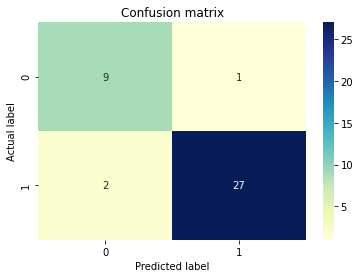

In [126]:
y_pred = best5.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

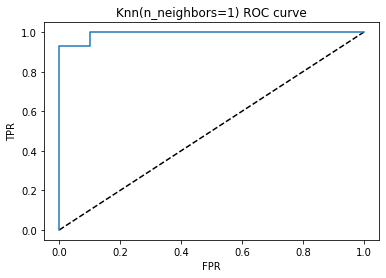

In [200]:
y_pred_proba = best5.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Knn(n_neighbors=1) ROC curve')
plt.show()

Combining the most accurate classifiers into a single Voting Classifier

In [197]:
bestV = VotingClassifier(estimators=[('knn', best4), ('abc', best3)],
                       voting='soft')
bestV.fit(x_train,y_train)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
scores = cross_val_score(bestV, x_train, y_train, scoring='accuracy', cv=cv)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

predict_scores = accuracy_score(y_test,bestV.predict(x_test))
print("Predict on test data: %0.3f" % predict_scores)

print("Classification report  \n %s" %\
      (classification_report(y_test, bestV.predict(x_test))))

Accuracy: 0.957 (+/- 0.056)
Predict on test data: 0.949
Classification report  
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39



Text(0.5, 15.0, 'Predicted label')

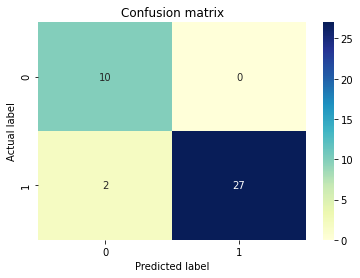

In [198]:
y_pred = bestV.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

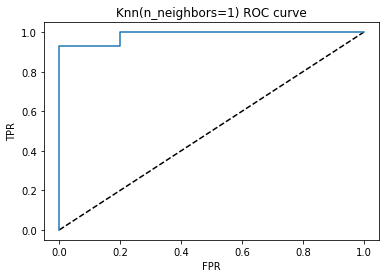

In [199]:
y_pred_proba = bestV.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Knn(n_neighbors=1) ROC curve')
plt.show()